In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
assets = ["SPY", "IEF", "GLD"]

data = yf.download(
    assets,
    start="2015-01-01",
    end="2024-01-01"
)

[*********************100%***********************]  3 of 3 completed


In [22]:
prices = data["Close"]

In [23]:
returns = np.log(prices / prices.shift(1)).dropna()

In [24]:
weights = np.array([0.5, 0.3, 0.2])  
portfolio_returns = returns.dot(weights)

In [25]:
VaR_95 = np.percentile(portfolio_returns, 5)
VaR_99 = np.percentile(portfolio_returns, 1)

CVaR_99 = portfolio_returns[portfolio_returns <= VaR_99].mean()

print("VaR %95:", VaR_95)
print("VaR %99:", VaR_99)
print("CVaR %99:", CVaR_99)

VaR %95: -0.0088079317120295
VaR %99: -0.014290298097394247
CVaR %99: -0.019521195180283498


In [27]:
print("COVID min return:", covid_returns.min())
print("COVID avg return:", covid_returns.mean())


COVID min return: -0.04031418695108109
COVID avg return: 0.0005165542216859085


In [28]:
mean = portfolio_returns.mean()
std = portfolio_returns.std()

np.random.seed(42)
simulations = 10000

simulated_returns = np.random.normal(mean, std, simulations)

stress_mc_99 = np.percentile(simulated_returns, 1)
print("Monte Carlo %99 Stress:", stress_mc_99)

Monte Carlo %99 Stress: -0.012579974949916304


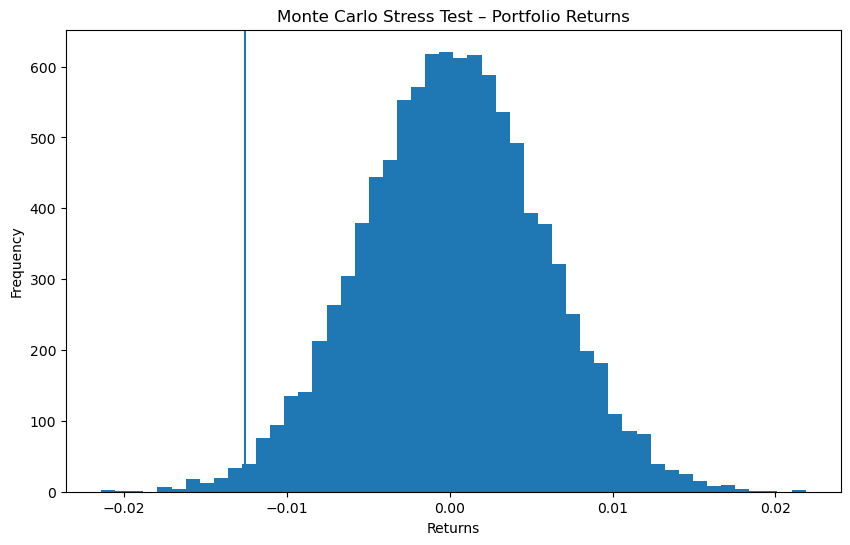

In [29]:
plt.figure(figsize=(10,6))
plt.hist(simulated_returns, bins=50)
plt.axvline(stress_mc_99)
plt.title("Monte Carlo Stress Test – Portfolio Returns")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()